In [7]:
#let us start by using the defualt sqlite3 querying method which will give
#the result feedback as nested tuples
#in this case, we are trying to inform the python module to give be ready to read sql database
# what happens here is that we just passed an information or initiated an instance that takes conn as a variable that will be able to read the .db data
#let us now try to initaite an instance known as cursor instance
#moving in the database, we will pass an instance that gets feedbak from our factbook.db
#this line of code is thesame with saying
#conn.cursor.execute(query)

import sqlite3
import pandas as pd

conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
cursor.execute(q1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [6]:
#lets move more into creating ad visualizing more clean tables using pandas

import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q1 = "select * from sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

type             name         tbl_name  rootpage  \
0  table  sqlite_sequence  sqlite_sequence         3   
1  table            facts            facts        47   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...

In [8]:
#we are telling python to locate the facts table in the file and give us the first 5
#occuring rows.
q2 = "select * from facts limit 5"
pd.read_sql_query(q2, conn)

id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  
0               2.32       38.57       13.89            1.51  
1               0.30       12.92        6.58            3.30  
2               1.84       23.67        4.31            0.92  
3               0.12        8.13        6.96            0.00  
4               2.78       38.78       11.49            0.46

In [11]:
q3 = "select min(population) min_pop, max(population) max_pop,min(population_growth) min_pop_growth,max(population_growth) max_pop_growth from facts"

pd.read_sql_query(q3, conn)

min_pop     max_pop  min_pop_growth  max_pop_growth
0        0  7256490011             0.0            4.02

In [14]:
q4 = '''select * from facts
where population == (select max(population) from facts)
'''
pd.read_sql_query(q4, conn)

id code   name  area area_land area_water  population  population_growth  \
0  261   xx  World  None      None       None  7256490011               1.08   

   birth_rate  death_rate migration_rate  
0        18.6         7.8           None

In [15]:
q5 = ''' select * from facts 
where population == (select min(population) from facts)
'''
pd.read_sql_query(q5, conn)

id code        name  area  area_land area_water  population  \
0  250   ay  Antarctica  None     280000       None           0   

  population_growth birth_rate death_rate migration_rate  
0              None       None       None           None

In [16]:
# something is getting fishy with this data.
# no doubt the min(population) shows 0 because the country 
# antartica is known for its unfavorable weather condition for human habitation.
# getting deep into the max(population), i think, a data is mistaked for other.
# could it be that the country world is a row in our fact table showing the total
# population on earth? and no prior data concerning land and sea covrage was noted.

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ba25244a8>,
      dtype=object)

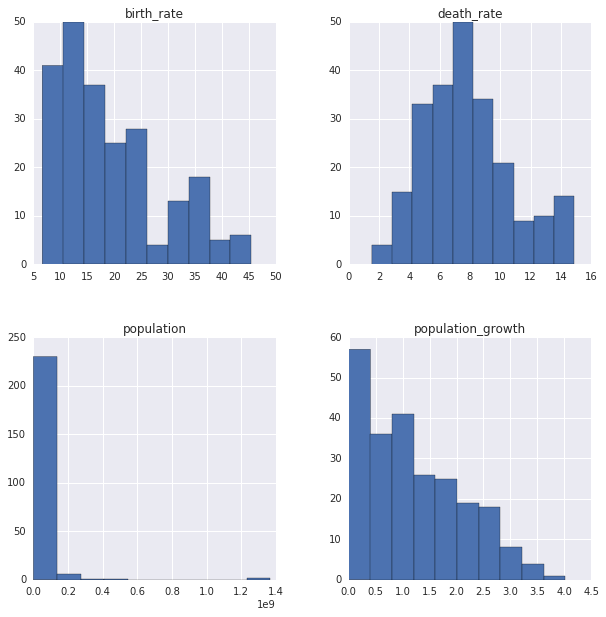

In [17]:
# now lets visualize our data with plot that is histogram for the countries.
# to generate histograms, we will be using matplotlib which is a module in python
# specifically meant for this.
# what is our aim with this visualization?
# i want to represent the population, population_growth, birth_rate and death_rate with this.
#

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = ''' select population, population_growth, birth_rate, death_rate
from facts
where population != (select min(population) from facts)
AND population != (select max(population) from facts)
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

In [20]:
#now lets get deep with further questions concerning the represented countries
#lets check out for country with the highest density

q7 = ''' select name, cast(population as float)/cast(area as float) 
as density from facts 
order by density desc limit 30;
'''
pd.read_sql_query(q7, conn)

name       density
0              Macau  21168.964286
1             Monaco  15267.500000
2          Singapore   8141.279770
3          Hong Kong   6445.041516
4         Gaza Strip   5191.819444
5          Gibraltar   4876.333333
6            Bahrain   1771.859211
7           Maldives   1319.640940
8              Malta   1310.015823
9            Bermuda   1299.925926
10      Sint Maarten   1167.323529
11        Bangladesh   1138.069143
12          Guernsey    847.179487
13            Jersey    838.741379
14          Barbados    675.823256
15         Mauritius    656.777941
16            Taiwan    650.781712
17             Aruba    623.122222
18           Lebanon    594.682788
19      Saint Martin    588.037037
20        San Marino    541.311475
21      Korea, South    492.531047
22            Rwanda    480.740109
23         West Bank    475.318430
24             Nauru    454.285714
25            Tuvalu    418.038462
26       Netherlands    407.960523
27  Marshall Islands    398.845304
28            Israel    387.545209
29           Burundi    385.996263

In [29]:
q8 = ''' select population, population_growth, birth_rate, death_rate
from facts
where population != (select min(population) from facts)
AND population != (select max(population) from facts)
'''
pd.read_sql_query(q8, conn)

population  population_growth  birth_rate  death_rate
0      32564342               2.32       38.57       13.89
1       3029278               0.30       12.92        6.58
2      39542166               1.84       23.67        4.31
3         85580               0.12        8.13        6.96
4      19625353               2.78       38.78       11.49
5         92436               1.24       15.85        5.69
6      43431886               0.93       16.64        7.33
7       3056382               0.15       13.61        9.34
8      22751014               1.07       12.15        7.14
9       8665550               0.55        9.41        9.42
10      9780780               0.96       16.64        7.07
11       324597               0.85       15.50        7.05
12      1346613               2.41       13.66        2.69
13    168957745               1.60       21.14        5.61
14       290604               0.31       11.87        8.44
15      9589689               0.20       10.70       13.36
16     11323973               0.76       11.41        9.63
17       347369               1.87       24.68        5.97
18     10448647               2.78       36.02        8.21
19       741919               1.11       17.78        6.69
20     10800882               1.56       22.76        6.52
21      3867055               0.13        8.87        9.75
22      2182719               1.21       20.96       13.39
23    204259812               0.77       14.46        6.58
24       429646               1.62       17.32        3.52
25      7186893               0.58        8.92       14.44
26     18931686               3.03       42.03       11.72
27     56320206               1.01       18.39        7.96
28     10742276               3.28       42.01        9.27
29     15708756               1.58       23.83        7.68
..          ...                ...         ...         ...
210      112162               1.33       12.56        8.18
211      148406               0.43       13.80        8.20
212       39689               1.51       13.00        4.51
213        9838               2.95       14.33        8.03
214        1190               0.03         NaN         NaN
215        1337               0.01         NaN         NaN
216        1872               0.03         NaN         NaN
217       15700                NaN         NaN         NaN
218       16418               2.03       12.67        4.57
219       70196               0.50       11.33        8.23
220       33454               2.32       10.91        4.99
221       56092               2.10       12.11        5.53
222       15700                NaN         NaN         NaN
223        3361               0.01       10.90        4.90
224       29258               0.24       14.08        8.37
225       66080               0.34        9.84        8.78
226       97294               0.80       11.91        7.68
227       87545               0.76       11.10       10.06
228        5241               0.50       11.26        6.30
229          48               0.00         NaN         NaN
230        7795               0.24        9.88        7.44
231       50280               2.30       16.13        3.10
232       54343               0.30       22.89        4.75
233      161785               0.54       16.82        5.12
234       52344               2.18       18.32        3.71
235     3598357               0.60       10.86        8.67
236      103574               0.59       10.31        8.54
237     1869055               2.81       31.11        3.04
238     2785366               1.95       22.99        3.50
239      570866               2.82       30.24        8.34

[240 rows x 4 columns]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ba1721240>],
      dtype=object)

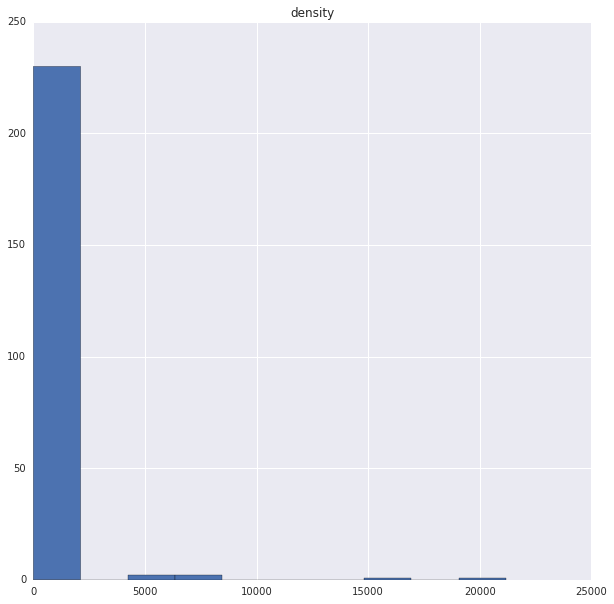

In [28]:
# now lets represent this figure in histogram where name will be 
#plotted against population density
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q7 = ''' select cast(population as float)/cast(area as float) 
as density
from facts
'''
pd.read_sql_query(q7, conn).hist(ax=ax)

In [31]:
# which countries now have the highest ratios of water to land?
q9 = '''select name, cast(area_water as float)/cast(area_land as float)
as ratio_water_land from facts
'''
pd.read_sql_query(q9, conn)

name  ratio_water_land
0                                      Afghanistan          0.000000
1                                          Albania          0.049274
2                                          Algeria          0.000000
3                                          Andorra          0.000000
4                                           Angola          0.000000
5                              Antigua and Barbuda          0.000000
6                                        Argentina          0.015972
7                                          Armenia          0.054604
8                                        Australia          0.007670
9                                          Austria          0.017296
10                                      Azerbaijan          0.048058
11                                    Bahamas, The          0.386613
12                                         Bahrain          0.000000
13                                      Bangladesh          0.140509
14                                        Barbados          0.000000
15                                         Belarus          0.023164
16                                         Belgium          0.008257
17                                          Belize          0.007016
18                                           Benin          0.018080
19                                          Bhutan          0.000000
20                                         Bolivia          0.014105
21                          Bosnia and Herzegovina          0.000195
22                                        Botswana          0.026468
23                                          Brazil          0.018859
24                                          Brunei          0.094967
25                                        Bulgaria          0.022030
26                                    Burkina Faso          0.001461
27                                           Burma          0.035302
28                                         Burundi          0.083723
29                                        Cambodia          0.025607
..                                             ...               ...
231              Falkland Islands (Islas Malvinas)          0.000000
232                                      Gibraltar          0.000000
233                                       Guernsey          0.000000
234                                         Jersey          0.000000
235                                    Isle of Man          0.000000
236                                     Montserrat          0.000000
237                               Pitcairn Islands          0.000000
238  Saint Helena, Ascension, and Tristan da Cunha          0.000000
239       South Georgia and South Sandwich Islands          0.000000
240                       Turks and Caicos Islands          0.000000
241                                 American Samoa          0.000000
242                                           Guam          0.000000
243                                 Navassa Island          0.000000
244                       Northern Mariana Islands          0.000000
245                                    Puerto Rico          0.554791
246                                 Virgin Islands          4.520231
247                                    Wake Island          0.000000
248  United States Pacific Island Wildlife Refuges               NaN
249                                     Antarctica               NaN
250                                     Gaza Strip          0.000000
251                                Paracel Islands          0.000000
252                                Spratly Islands          0.000000
253                                      West Bank          0.039007
254                                 Western Sahara          0.000000
255                                   Arctic Ocean               NaN
256                                 Atlantic Ocean               NaN
257                                   Indian

In [32]:
q10 = ''' select name, cast(area_water as float)/cast(area_land as float)
as ratio_water_land from facts
where ratio_water_land > 1
'''
pd.read_sql_query(q10, conn)

# this data has proven that virgin islands and Bristish ocean terriroty are marked with 
#tremendous water to lad

name  ratio_water_land
0  British Indian Ocean Territory        905.666667
1                  Virgin Islands          4.520231